In [26]:
import pandas as pd
import csv
import acquire
import prepare
import seaborn as sns
import numpy as np
from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Acquire Fitbit data

In [2]:
df = acquire.merge_dataframes()

In [4]:
df.head()

,date,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
1,2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566
2,2018-04-27,"3,649","9,971",4.7,19,"1,158",219,46,17,"1,752"
3,2018-04-28,"3,379","3,521",1.66,2,702,155,22,11,"1,124"
4,2018-04-29,"2,851","1,639",0.77,0,891,122,0,0,602
5,2018-04-30,"2,825","1,323",0.62,0,880,104,0,0,540


In [5]:
df.shape

(225, 10)

# Prepare

In [6]:
df = prepare.update_dtypes(df)

In [7]:
df.dtypes

calories_burned             int64
steps                       int64
distance                  float64
 floors                     int64
minutes_sedentary           int64
minutes_lightly_active      int64
minutes_fairly_active       int64
minutes_very_active         int64
activity_calories           int64
dtype: object

# Exploration

In [8]:
df.sort_values('steps',ascending=True)

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
date,,,,,,,,,
2018-06-27,2145,0,0.00,0,1440,0,0,0,0
2018-07-04,2183,0,0.00,0,1438,2,0,0,42
2018-07-03,2144,0,0.00,0,1440,0,0,0,0
2018-06-30,2145,0,0.00,0,1440,0,0,0,0
2018-06-06,2145,0,0.00,0,1440,0,0,0,0
2018-06-07,2146,0,0.00,0,1440,0,0,0,0
2018-06-29,2180,0,0.00,0,1437,3,0,0,39
2018-06-11,2146,0,0.00,0,1440,0,0,0,0
2018-06-28,2145,0,0.00,0,1440,0,0,0,0


In [18]:
def peekatdata(df):
    print("\n \n SHAPE:")
    print(df.shape)

    print("\n \n COLS:")
    print(df.columns)

    print("\n \n INFO:")
    print(df.info())

    print("\n \n Missing Values:")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())

    print("\n \n DESCRIBE:")
    print(df.describe())

    print('\n \n HEAD:')
    print(df.head(5))

    print('\n \n TAIL:' )
    print(df.tail(5))

peekatdata(df)


 
 SHAPE:
(225, 9)

 
 COLS:
Index(['calories_burned', 'steps', 'distance', ' floors', 'minutes_sedentary',
       'minutes_lightly_active', 'minutes_fairly_active',
       'minutes_very_active', 'activity_calories'],
      dtype='object')

 
 INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 9 columns):
calories_burned           225 non-null int64
steps                     225 non-null int64
distance                  225 non-null float64
 floors                   225 non-null int64
minutes_sedentary         225 non-null int64
minutes_lightly_active    225 non-null int64
minutes_fairly_active     225 non-null int64
minutes_very_active       225 non-null int64
activity_calories         225 non-null int64
dtypes: float64(1), int64(8)
memory usage: 27.6 KB
None

 
 Missing Values:
calories_burned           0
steps                     0
distance                  0
 floors                   0
minutes_sedentary         0
min

In [9]:
df.describe()

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,3401.911111,8536.186667,4.046800,12.591111,809.520000,188.235556,14.920000,33.871111,1484.546667
std,632.426578,5255.746608,2.506253,25.844174,243.232639,75.170001,15.363535,37.195986,747.795790
min,799.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000
25%,3069.000000,4714.000000,2.220000,2.000000,654.000000,158.000000,3.000000,2.000000,1062.000000
50%,3385.000000,7806.000000,3.680000,7.000000,750.000000,203.000000,11.000000,15.000000,1481.000000
75%,3765.000000,12380.000000,5.900000,13.000000,877.000000,236.000000,21.000000,63.000000,1962.000000
max,5199.000000,25512.000000,12.000000,195.000000,1440.000000,349.000000,78.000000,154.000000,3596.000000


In [19]:
def missing_values_col(df):
    """
    Write or use a previously written function to return the
    total missing values and the percent missing values by column.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    return pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})

missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
calories_burned,0,0.0,0,0.0,0,0.0
steps,0,0.0,0,0.0,0,0.0
distance,0,0.0,0,0.0,0,0.0
floors,0,0.0,0,0.0,0,0.0
minutes_sedentary,0,0.0,0,0.0,0,0.0
minutes_lightly_active,0,0.0,0,0.0,0,0.0
minutes_fairly_active,0,0.0,0,0.0,0,0.0
minutes_very_active,0,0.0,0,0.0,0,0.0
activity_calories,0,0.0,0,0.0,0,0.0


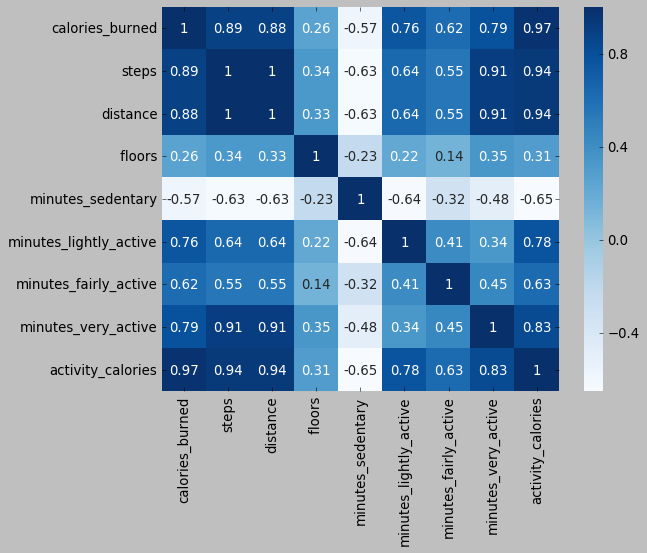

In [17]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)


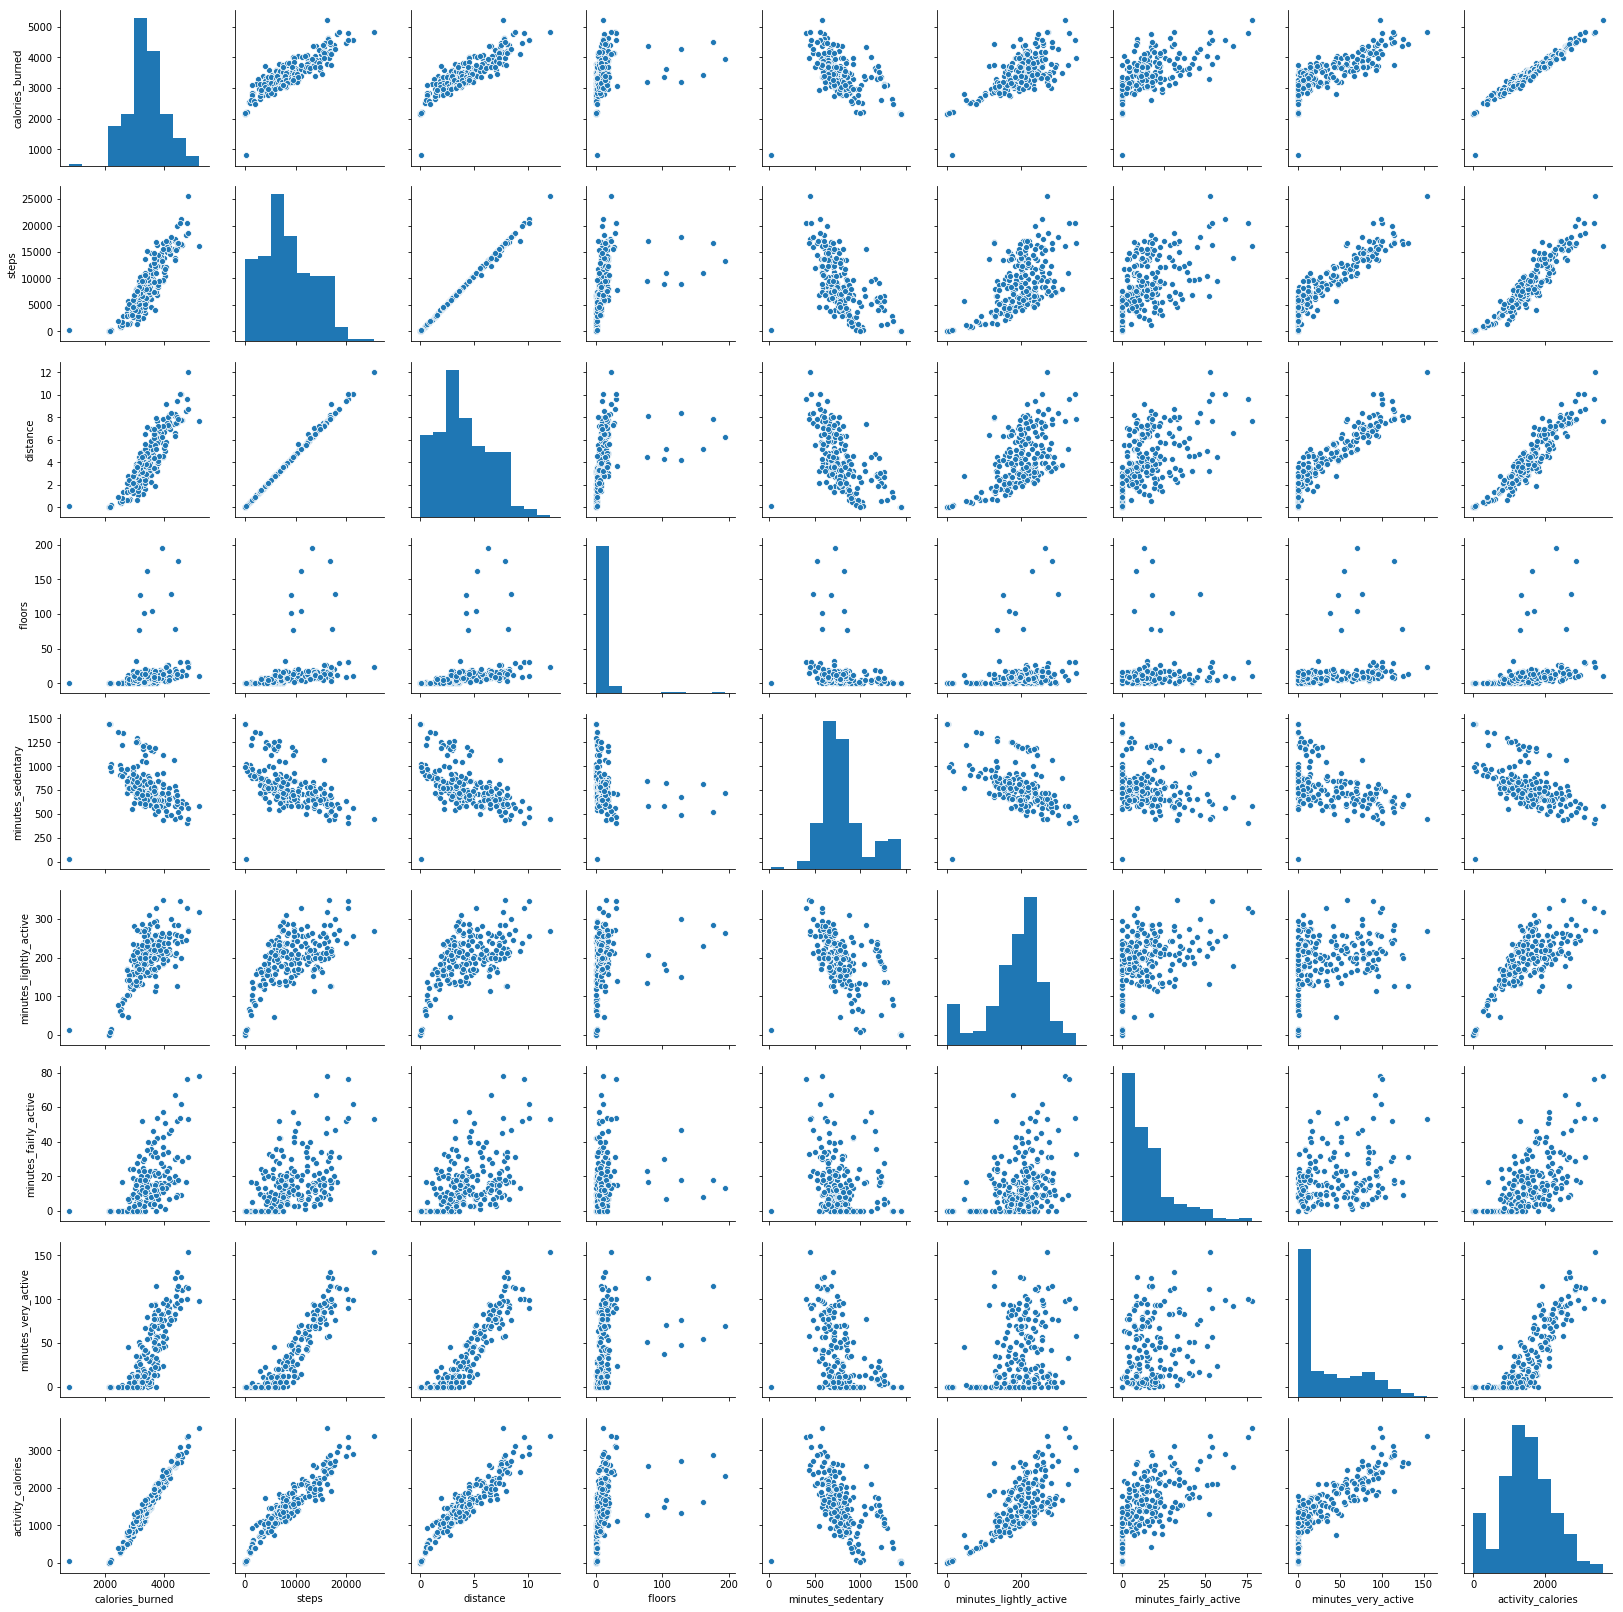

In [11]:
sns.pairplot(df)

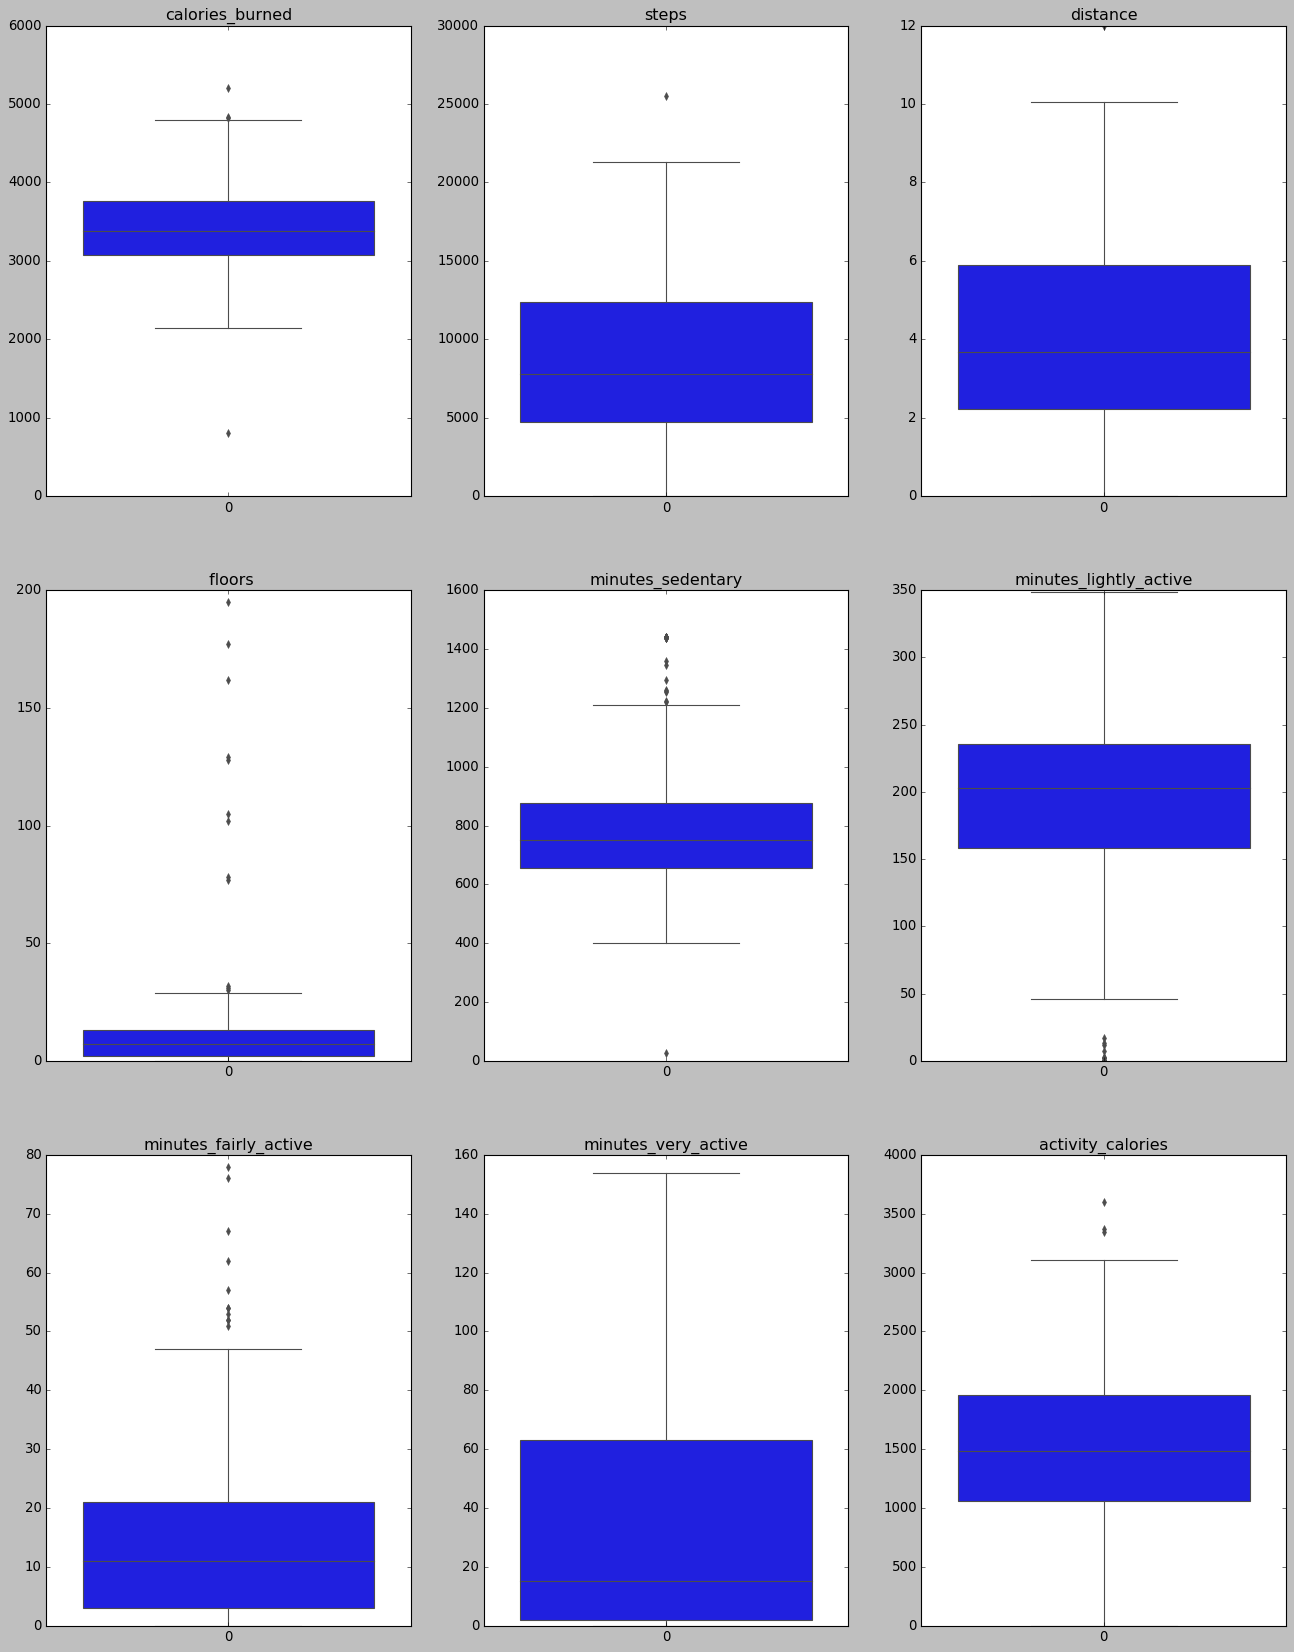

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')


plt.figure(figsize=(20, 25))

for i, col in enumerate(['calories_burned', 'steps', 'distance', ' floors', 'minutes_sedentary','minutes_lightly_active', 'minutes_fairly_active', 'minutes_very_active','activity_calories']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    sns.boxplot(data=series)

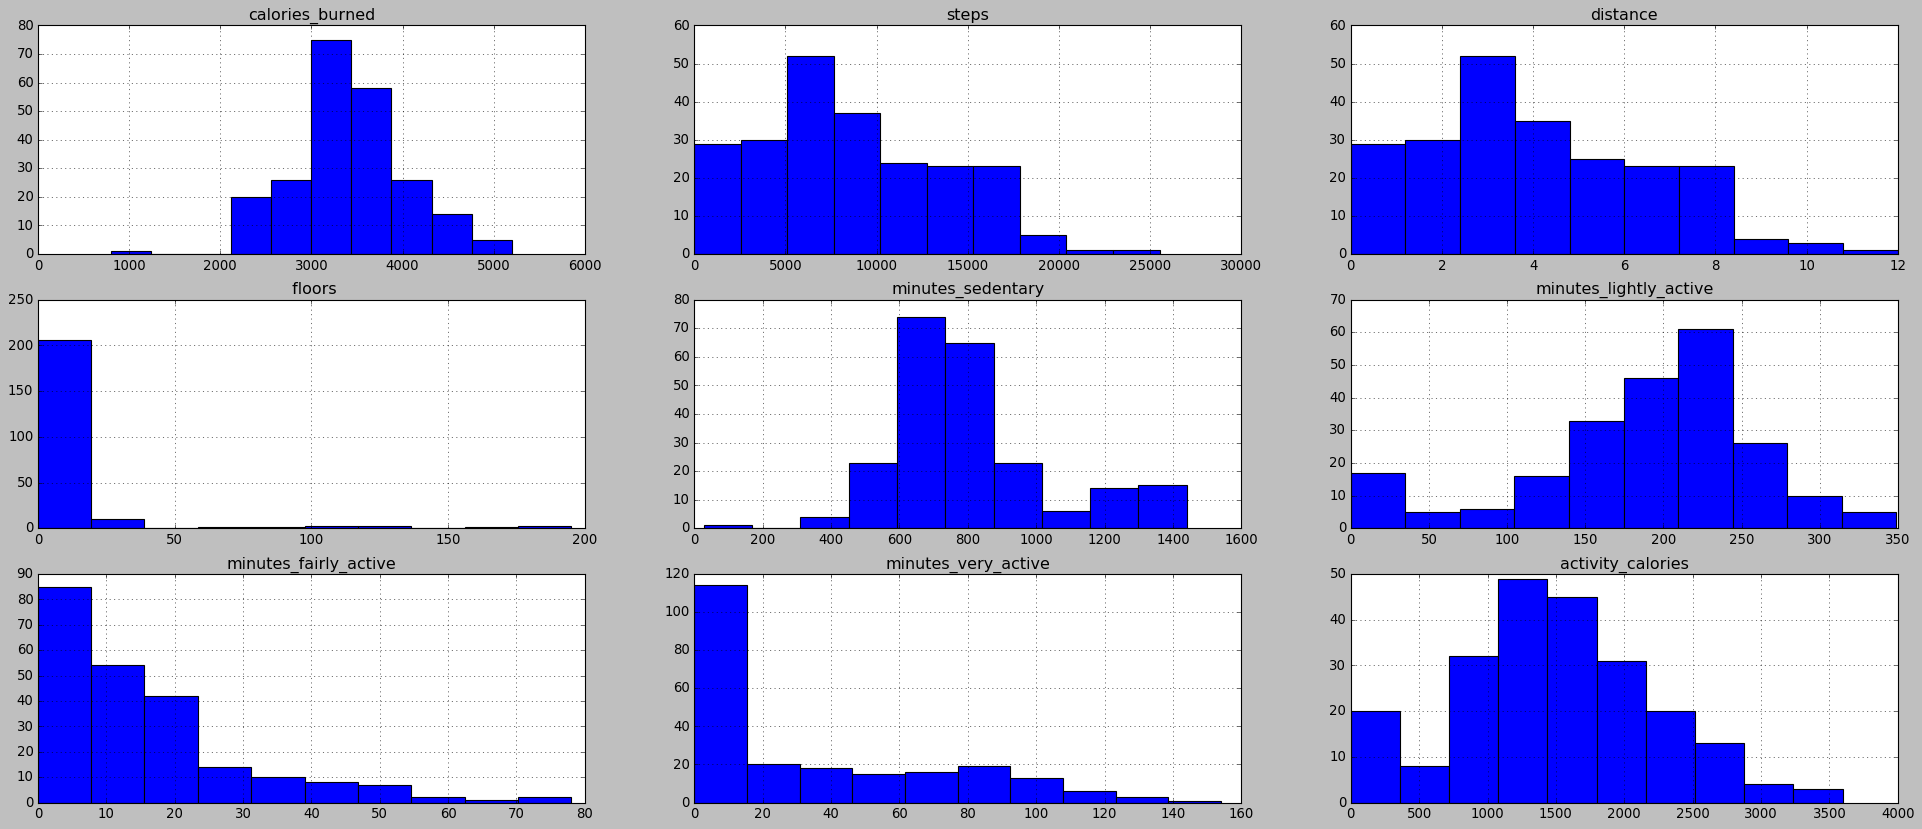

In [13]:
plt.figure(figsize=(30, 25))
for i, col in enumerate(['calories_burned', 'steps', 'distance', ' floors', 'minutes_sedentary','minutes_lightly_active', 'minutes_fairly_active', 'minutes_very_active','activity_calories']):  
    plot_number = i + 1  # i starts at 0, but plot nos should start at 1
    series = df[col]
    plt.subplot(6, 3, plot_number)
    plt.title(col)
    series.hist(density=False, cumulative=False, log=False)

In [21]:
train = df[:'2018-10-31']
test = df['2018-11-01':]
print(train.nunique())
print(test.nunique())

calories_burned           172
steps                     177
distance                  158
 floors                    30
minutes_sedentary         153
minutes_lightly_active    119
minutes_fairly_active      49
minutes_very_active        75
activity_calories         172
dtype: int64
calories_burned           36
steps                     36
distance                  35
 floors                   24
minutes_sedentary         34
minutes_lightly_active    30
minutes_fairly_active     23
minutes_very_active       29
activity_calories         36
dtype: int64


In [29]:
calories = train.resample('D').calories_burned.mean()

In [32]:
calories.head()

date
2018-04-26    2635
2018-04-27    3649
2018-04-28    3379
2018-04-29    2851
2018-04-30    2825
Freq: D, Name: calories_burned, dtype: int64

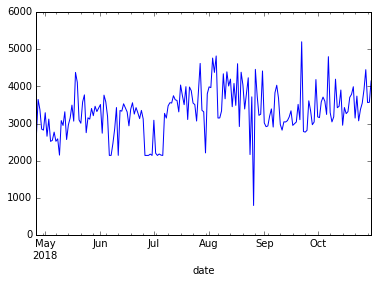

In [33]:
calories.plot()

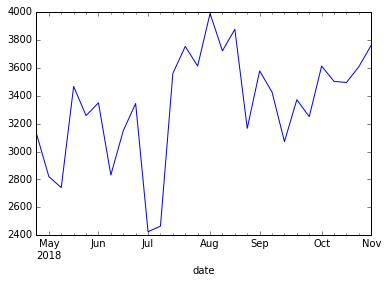

In [34]:
calories.resample('W').mean().plot()

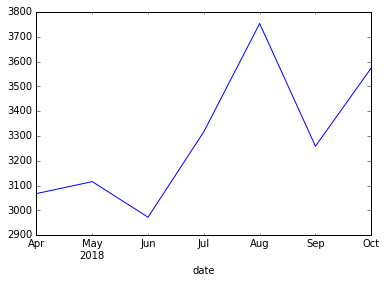

In [35]:
calories.resample('MS').mean().plot()

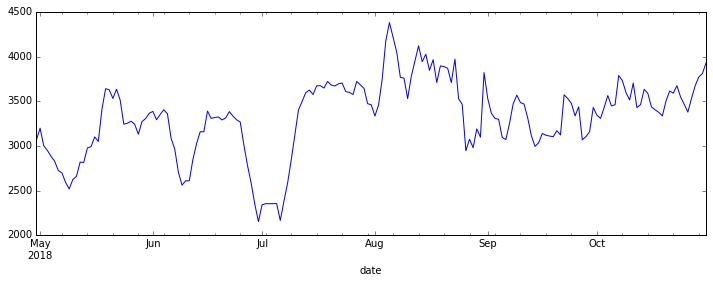

In [36]:
calories.rolling(5).mean().plot(figsize=(12, 4))


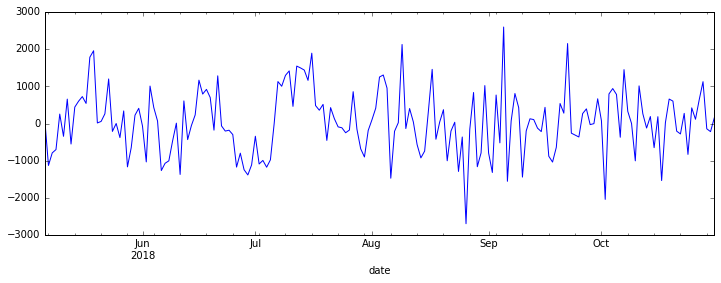

In [37]:
calories.diff(periods=10).plot(figsize=(12, 4))


# Feature Engineering

In [ ]:
with open('2018-04-26_through_2018-05-26.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df = pd.DataFrame(interestingrows)

In [ ]:
df.head()

In [ ]:
with open('2018-05-27_through_2018-06-26.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
interestingrows

In [ ]:
df1 = pd.DataFrame(interestingrows)

In [ ]:
df1

In [ ]:
with open('2018-06-27_through_2018-07-27.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df2 = pd.DataFrame(interestingrows)

In [ ]:
df2

In [ ]:
with open('2018-07-28_through_2018-08-26.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df3 = pd.DataFrame(interestingrows)

In [ ]:
df3

In [ ]:
with open('2018-08-27_through_2018-09-26.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df4 = pd.DataFrame(interestingrows)

In [ ]:
df4

In [ ]:
with open('2018-09-27_through_2018-10-27.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df5 = pd.DataFrame(interestingrows)

In [ ]:
df5

In [ ]:
with open('2018-10-28_through-2018-11-27.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df6 = pd.DataFrame(interestingrows)

In [ ]:
with open('2018-11-28_through_2018-12-28.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df7 = pd.DataFrame(interestingrows)